# 1.0 Análise Exploratoria de Dados (EDA) - Telco Churn
**Objetivo:** Entender o comportamento dos clientes, identificar padrões de cancelamento e validade a qaulidade dos dados vindos do banco SQL

In [2]:
# Import inicial de blibiotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

# Caminho dinâmico para o banco de dados
db_path = os.path.join('..', 'data', 'telecom.db')

print(f"Caminho do banco: {db_path}")

Caminho do banco: ..\data\telecom.db


In [4]:
# Carregando dados do banco, query para puxar a tabela, conexão SQLite e fechando conexao.
conn = sqlite3.connect(db_path)

query = "SELECT * FROM tbl_churn_raw"

df = pd.read_sql(query, conn)

conn.close()

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [6]:
## Pela query via SQL, percebemos valores nulos na coluna total_charges
df['totalcharges'].isnull().sum()

np.int64(11)

C:\Users\init\AppData\Local\Temp\ipykernel_16748\3720190055.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='churn', data=df, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

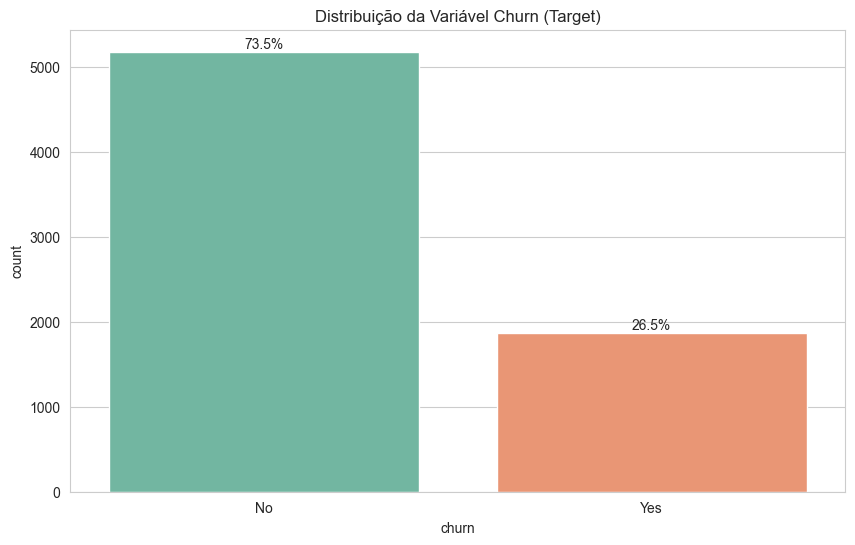

In [ ]:
# Analise Gráfica
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Visualizando o desbalanceamento
target = 'churn'
ax = sns.countplot(x='churn', data=df, palette='Set2')
total = len(df)
for i in ax.patches:
    percentage = f'{100 * i.get_height() / total:.1f}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribuição da Variável Churn (Target)')   
plt.show

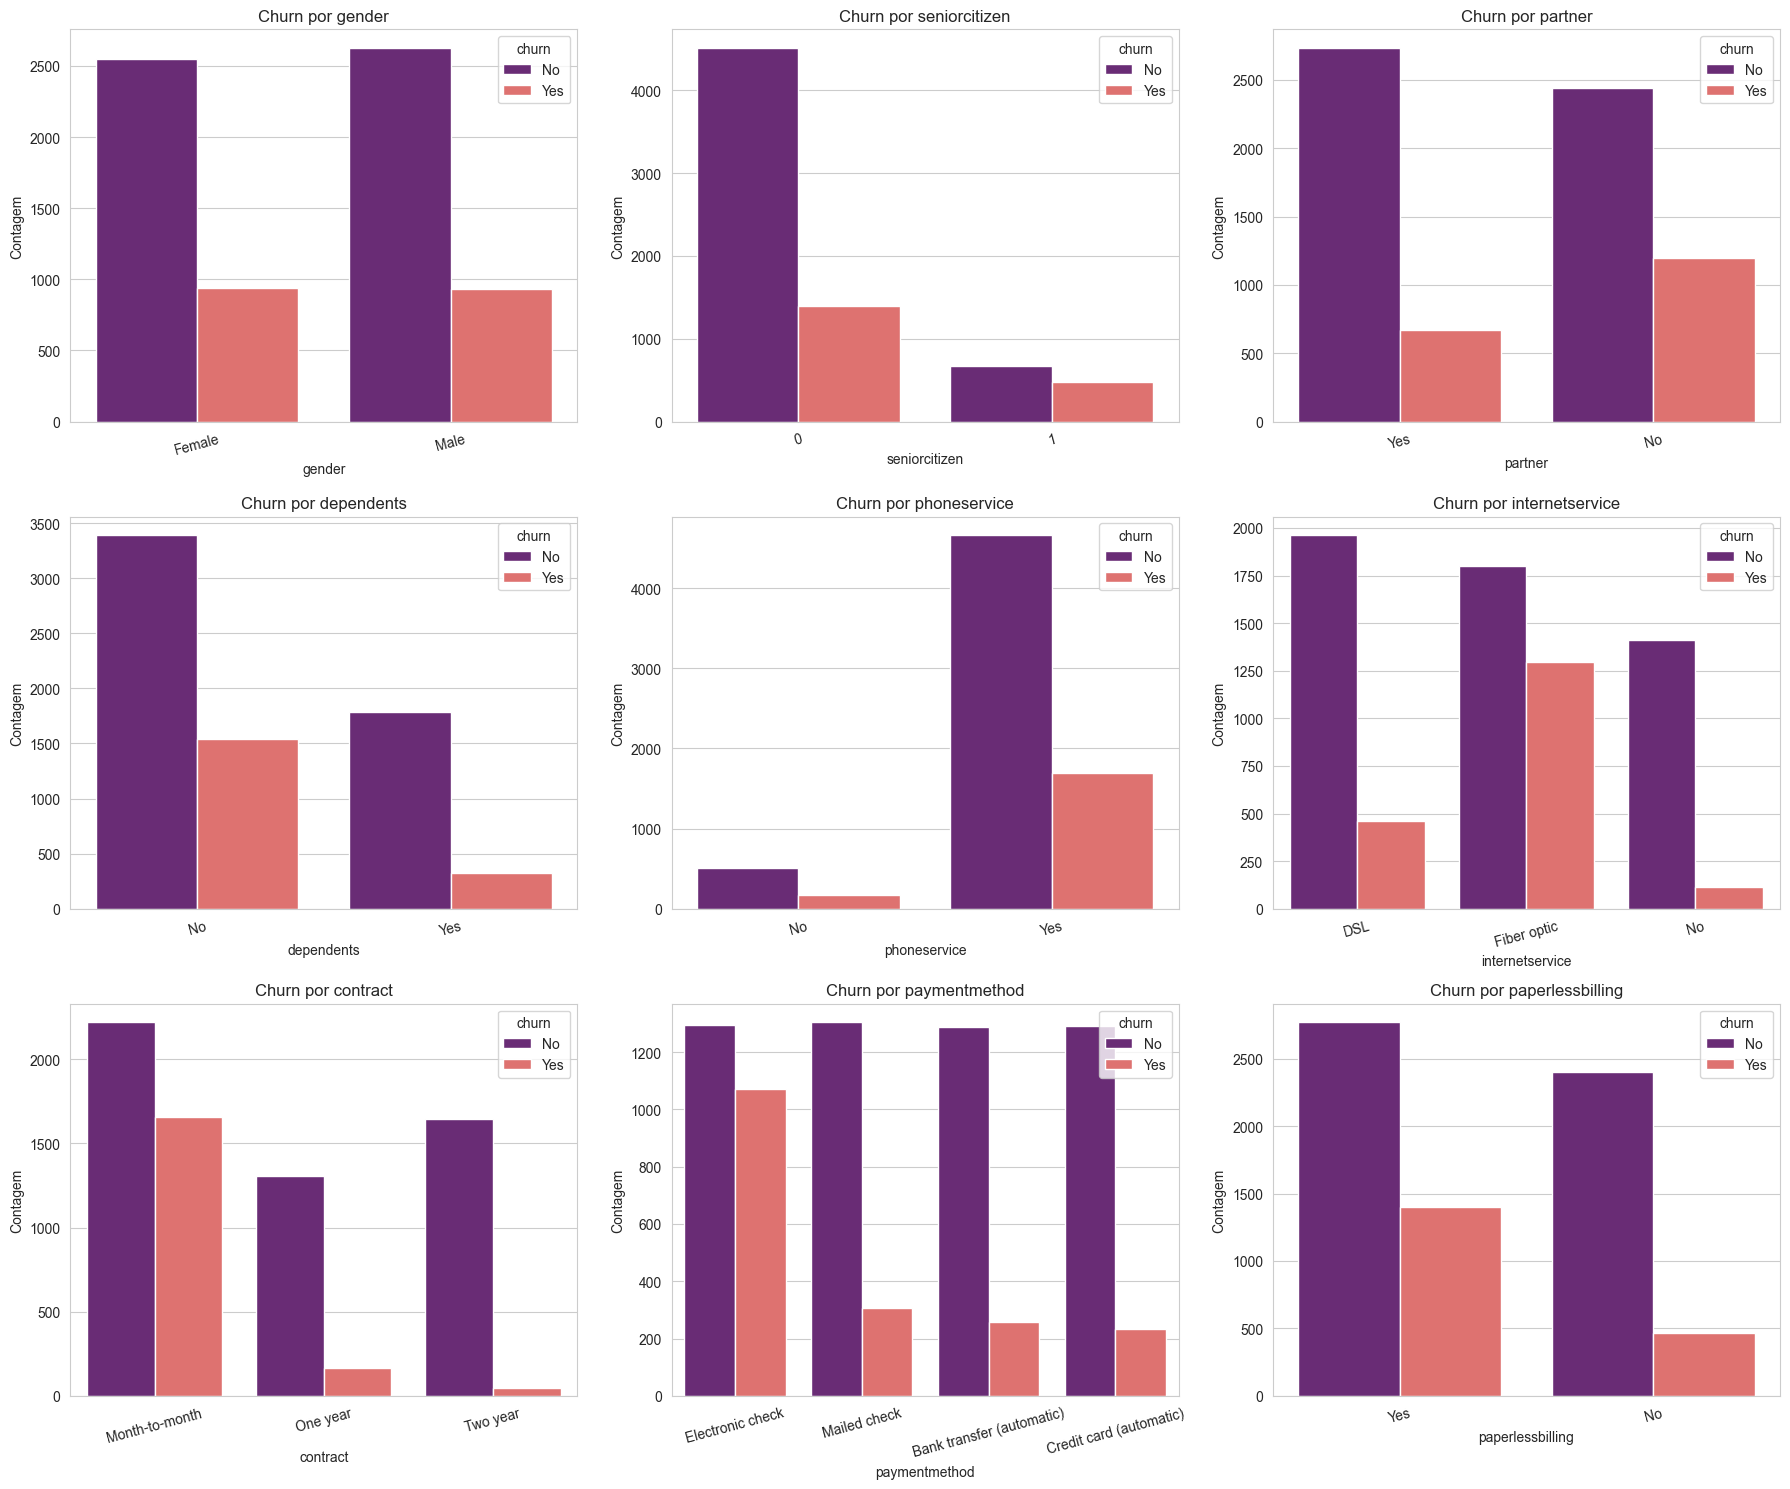

In [12]:
# Selecionando colunas categóricas (excluindo ID e o próprio Churn)
cat_cols = [
    'gender', 'seniorcitizen', 'partner', 'dependents', 
    'phoneservice', 'internetservice', 'contract', 
    'paymentmethod', 'paperlessbilling'
]

# Configurando o grid de gráficos (3 por linha)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten() # Transforma a matriz em uma lista linear para facilitar o loop

for i, col in enumerate(cat_cols):
    # Gráfico de contagem dividido por Churn (hue='churn')
    sns.countplot(x=col, hue='churn', data=df, ax=axes[i], palette='magma')
    axes[i].set_title(f'Churn por {col}')
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=15) # Gira o texto se for longo

plt.tight_layout()
plt.show()

 Clientes que optam por **Fiber Otic** em **internetservice**, tem o churn muito alto, ideial migrar para outro serviço de internet
 

 Clientes que tem o **contract** por **month-to-month** é recomendo aos elaborar uma campanha para clientes que tenham contrato por mais de um ano.
 

 Clientes com pagamentos **'Electronic check'** tambem são churn muito alto, recomendo oferecerem outros meios de pagamentos para evitar o churn tao alto 
 
